<a href="https://colab.research.google.com/github/amal2334/Big-Data-Analytics/blob/main/Retail_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Shopping Trends Dataset**
**Introduction:**
- The dataset I’m using has a small number of rows (around 3,900), but it includes many useful and rich columns.
- Even though it's small, it still holds valuable insights that can help businesses improve their marketing strategies and increase profits.
- The dataset was downloaded from Kaggle and is considered small in size.
- I will clean and analyze it carefully to extract the most important insights.
- After analyzing this dataset, I will also bring in other datasets and analyze each one separately to make the project more complete and meaningful.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**1- Loading the dataset :**

In [ ]:
data=pd.read_csv('shopping_trends_updated.csv')
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [ ]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

# **Note:**
- our dataset contain 18 columns that very valuable, helpful and insightful just like :
 - **Customer ID** : a unique identifier for each customer
 - **Age** : the age of customer , in years , this can be used to analyze spending patterns across different age group
 - **Gender** : the gender of customers ( male and female ) , this might be useful to analyze purchasing behavior based on gender
 - **item purchased**: the specific product or item that customer bought ( blouse , sweater . ...)
 - **category** : the broader category to which the purchased item belongs ( clothing , Footwear , Electronics)
 - **Purchase Amount ( USD)**: the moneteray values of the item purchased in US dollars , it is useful to identify valuable customers
 - **Location** : geographical location of he customer
 - **Size** : the size of the purchased item
 - **Color**: color of the purchased item
 - **season**: the season during wich the purchase was made : ( winter spring)
 - **Review Rating**: a rating given by the customer for the purchased item
 - **Subscription Status**: indicates whether the customer has a subscription (YES , NO ) , it is useful for analyzing the behavior of subscribers versus non subscribers .
 - **Shipping Type**: the methods of shipping chosen by the customer ( Express , Free Shiping ) , can provide insight into customer prefrences for delivery .
 - **Discount Applied** : Indicated whether a discount as applied to the purchase
 - **Promo Code** : Indicates whether a promotional code was used for the purchase
 - **previous Purchase** : the number of previous purchase made by the customer , this can be an indicator of customer loyalty .
 - **Paymant Method** : the method used by the customer to pay the purchase , can provide insight into payment preferences .
 - **Frequency of Purchase** : how often the customer makes a purcahse , another indicator of customer engagment and loyalty



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
data.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [ ]:
data.shape

(3900, 18)

In [ ]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# **Note:**
- The describe method in pandas gives us an overview of the statistical methods for numerical feature (central tendency and dispersion).

- **count**: this shows the number of the non-missing values in each column , here all five columns have 3900 non missing entries, wich matches the data shape.
- **Age** : with a mean value of   44 years and standard deviation around 15,21 with min/max ages are fron 18 to 70 years.

- **Purchase Amount** : mean of 59.76 USD , and standard deviation of 23.69 , min and max values from 20 to 100.
- **Review Rating** : with a mean value of 3.75 and std of 0.72 (low spread) , min and max fron 2.5 to 5.
- **Previous Purchase** : a mean value of 25.35 and std of 14.45 , min and max values from 1 to 50 .




# **2-Handelling missing values :**

In [ ]:
data.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


#**3- handelling duplicate values:**

In [ ]:
#let's check the duplictes values
data.duplicated().sum()

np.int64(0)

# **Note:**
- The datset is very clean , it doesn't contain nor duplicate values neither missing values.


# **4- detecting and handeling outliers :**

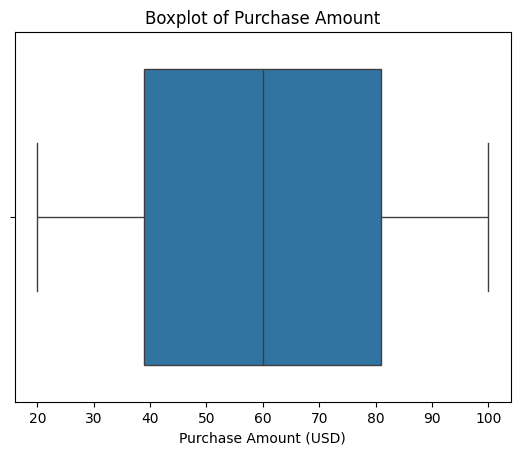

In [ ]:
sns.boxplot(x=data['Purchase Amount (USD)'])
plt.title('Boxplot of Purchase Amount')
plt.show()

# **Note:**
- Handelling outliers are important because they scan skew the statistics( they might affect mean , standard deviation wich can lead to misleading insight.
- they can as well affect the model performance.
- they can hide or exaggerate trends : in data visulization and analysis , outliers can hide patterns or make you think there is a trend when there is not one.

- The box plot represents the middle 50% of the data ( between Q1 and Q3) , also called interquantile range which is in range between 38 to 80 USD.
- The line in the middle of the box is the median Q2 ; 60 USD dollars.
- Anything outside the whiskers is considered a potential outliers.

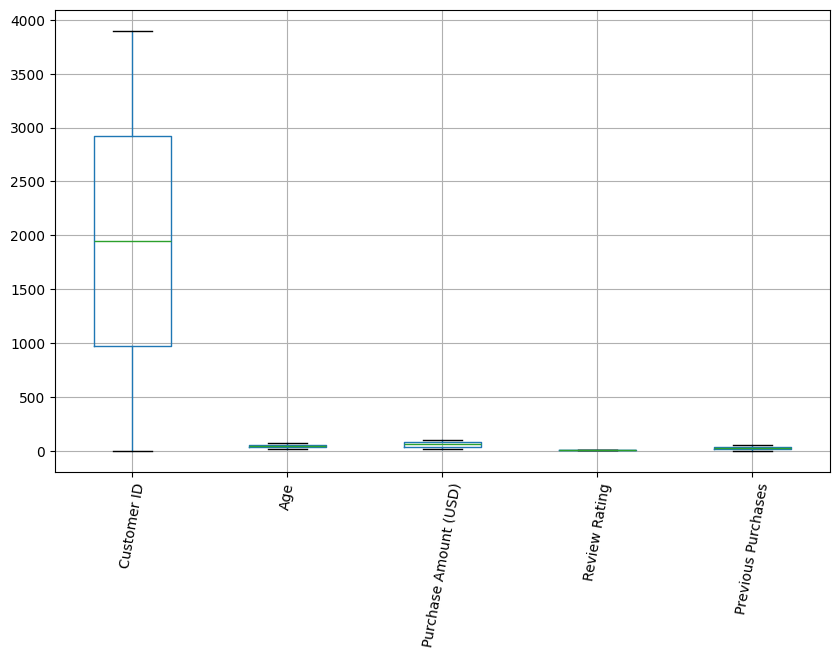

In [ ]:
plt.figure(figsize=(10, 6))
data.boxplot(rot=90)
plt.xticks(rotation=80)
plt.show()

# **Note:**
- i am using a boxplot for mutiple numerical features
- customer ID has avery large range , it is domunating the scale of y_axis , and this makes it hard to see the boxplot for other features , for this reason we are going to remove or ignore the customer ID ( just an identifier)

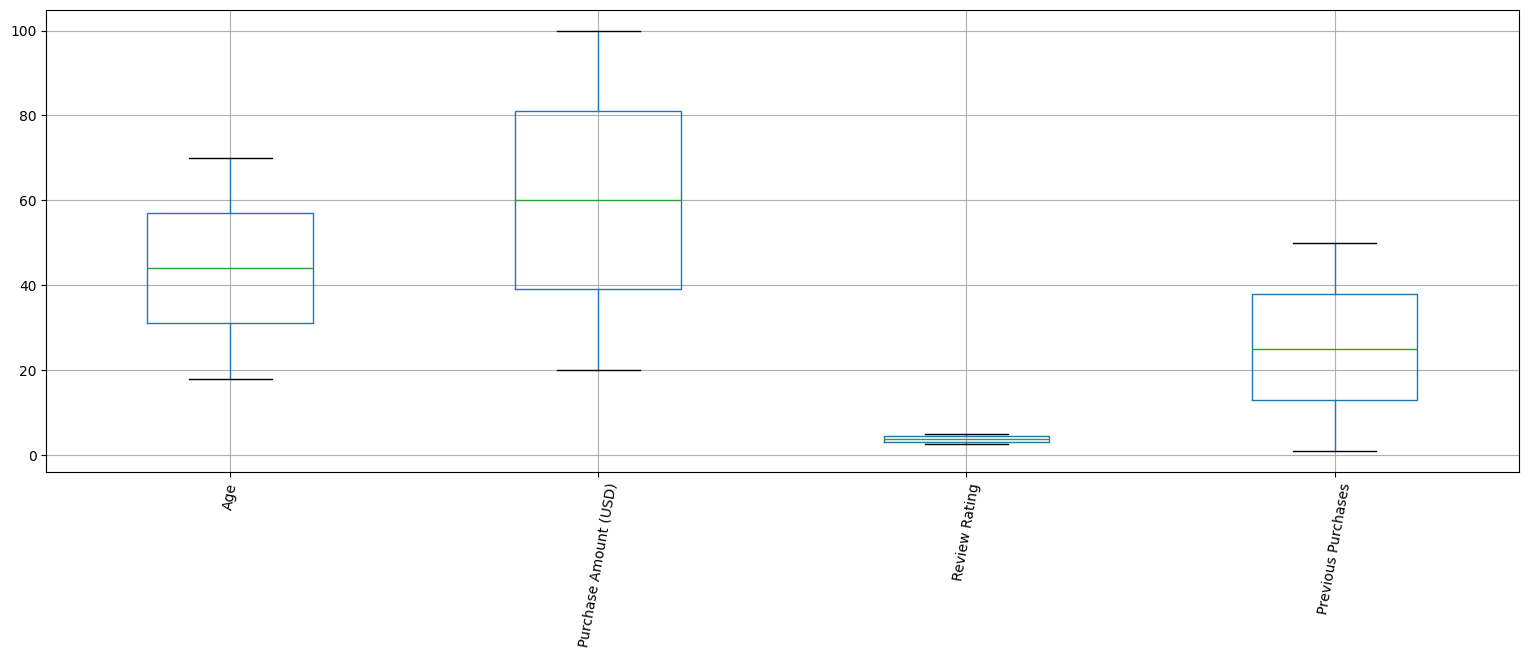

In [ ]:
data_numerical=data[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']]
plt.figure(figsize=(19, 6))
data_numerical.boxplot(rot=90)
plt.xticks(rotation=80)
plt.show()

# **Note:**
- All values are within the expected range (within 1.5*IQR from the box) , there are no outliers .
- The dataset is well-behaved.
- Review Rating values are from 0 to 5 , so the scale is small.

In [ ]:
numerical_columns = data.select_dtypes(include=['number']).columns
for col in numerical_columns:

  Q1=data[col].quantile(0.25)
  Q3=data[col].quantile(0.75)
  IQR= Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

outliers=data[(data[col]<lower_bound) | (data[col]>upper_bound)]
data[outliers]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**5- Exploratory Data analysis :**

- Using this dataset, I will answer key business questions that can provide **valuable insights**, such as:
 - **Product Popularity vs. Customer Satisfaction by Category**
 -  Top-Rated Product Categories by Average Review Score
 - **Promo Code Usage by Gender and Age Group**
 - Customer Preferences for Shipping Methods
 - **Seasonal Trends in Product Category Purchases**
 - Category Distribution - Total Revenue by Product Category
 - **Top Revenue-Generating Regions**
 - Total Purchase Amount by Gender
 - **Total Spending by Age Group**
 - Distribution of Payment Methods Used by Customers
 - **Customer Purchase Amounts by Discount Status**
 - Customer Purchase Frequency by Subscription Status
 - **Most Profitable Product Categorie**
 - Product category Distribution
 - **Top Most valuable Customers Ranked by Engagement**
 - Distribustion of customer Purchase Frequency


**1- Distribustion of customer Purchase Frequency**

In [ ]:
data['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

Text(0.5, 1.0, 'Frequency of Purchases')

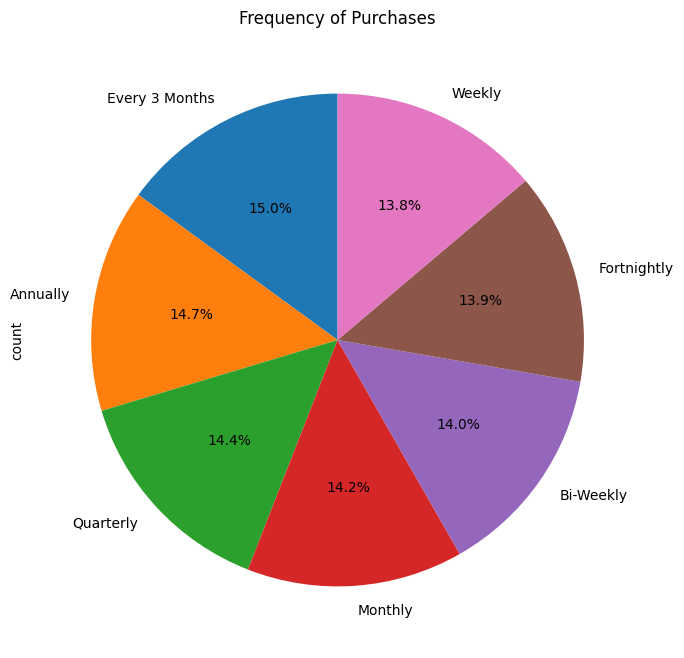

In [ ]:

plt.figure(figsize=(8, 8))
data['Frequency of Purchases'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Frequency of Purchases')

# **Note**
- The every 3 months category represents the largest segment(15%) , indicating that a asignificant portion of customer make purchase on this timeframe.
- Annaul purchasers , while the least frequent , still constityte a sighnificant portion of the customers base , highlighting the importance of retention stategries for these customers.

- This Pie chart provides valuable insights into the customers's purchasing behavior and can inform various aspects of the business strategy.

**2-Top Most valuable Customers Ranked by Engagement**

In [ ]:
frequency_mapping = {
    'Weekly': 6,
    'Bi-Weekly': 5,
    'Fortnightly': 4,
    'Monthly': 3,
    'Every 3 Months': 2,
    'Quarterly': 2,
    'Annually': 1
}

data['Frequency Score'] = data['Frequency of Purchases'].map(frequency_mapping)


# **Note**:
- In order to list the top customer , we need to filter them not only by Purchase amount or Previous purchase , but need to group columns of frequency of purchase , purchased amount, and previous purchase .



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[['prev_scaled', 'freq_scaled', 'amount_scaled']] = scaler.fit_transform(
    data[['Previous Purchases', 'Frequency Score', 'Purchase Amount (USD)']]
)


In [ ]:
data['Customer Value Score'] = (data['prev_scaled'] + data['freq_scaled'] + data['amount_scaled']) / 3


In [ ]:
top_customers = data.groupby('Customer ID')['Customer Value Score'].mean().sort_values(ascending=False).head(10)
top_customers



,Customer Value Score
Customer ID,
993,0.995833
1848,0.993197
2446,0.983333
3582,0.979167
2289,0.962500
1069,0.954592
4,0.951531
1512,0.948895
769,0.945153


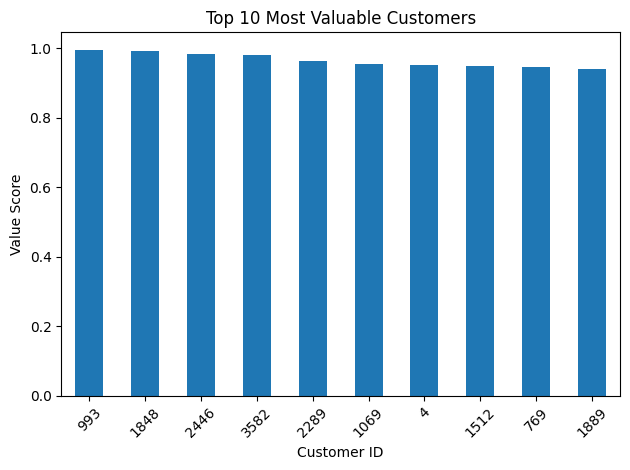

In [ ]:
import matplotlib.pyplot as plt

top_customers.plot(kind='bar', title='Top 10 Most Valuable Customers', ylabel='Value Score', xlabel='Customer ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3-Product category Distribution**

In [ ]:
top_products = data.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10)
top_products

,Purchase Amount (USD)
Item Purchased,
Blouse,10410
Shirt,10332
Dress,10320
Pants,10090
Jewelry,10010
Sunglasses,9649
Belt,9635
Scarf,9561
Sweater,9462


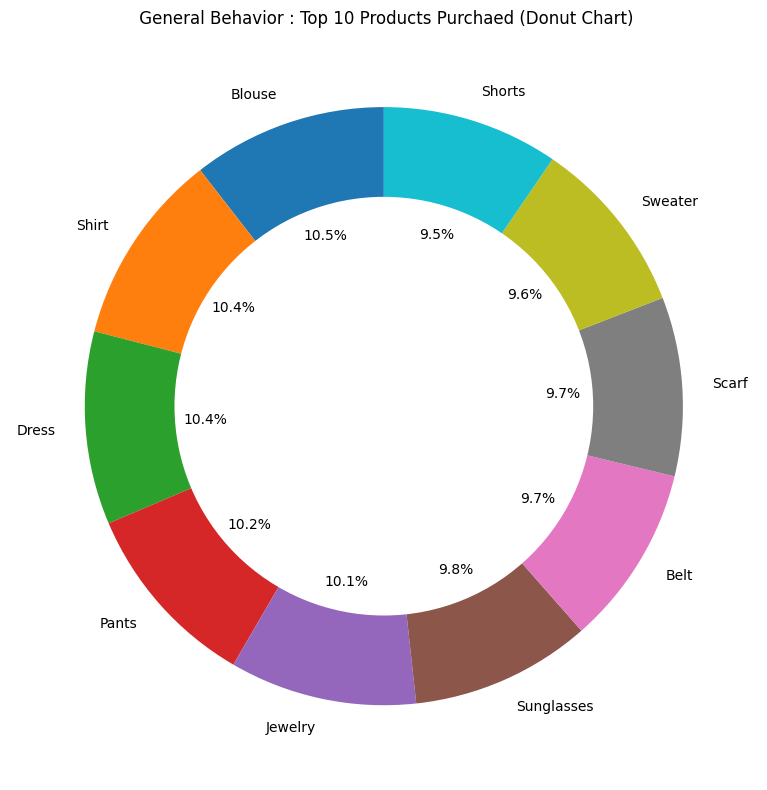

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(top_products, labels=top_products.index, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title(' General Behavior : Top 10 Products Purchaed (Donut Chart)')
plt.tight_layout()
plt.show()


# **Note:**
- The figure represents a donut chart that shows the top products purchased by general customers .
- 10.5 % of all   customers they have purchase Blouse.
- 10.4% of  all customers have purchased shirts and Dress.



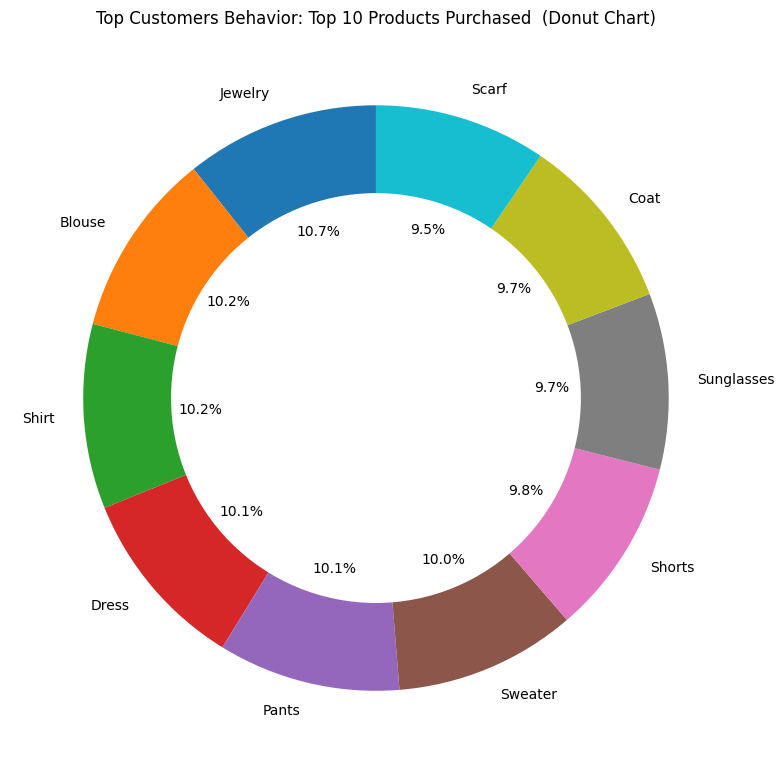

In [ ]:
top_customers_products = data.groupby('Item Purchased')['Customer Value Score'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_customers_products, labels=top_customers_products.index, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Top Customers Behavior: Top 10 Products Purchased  (Donut Chart)')
plt.tight_layout()
plt.show()

# **Note :**
- 10.7% of top customers thay have purchased jewlery .
- 10.2% of top customers thay have purchased blouse and shirt .


**4-Most Profitable Product Categorie**

In [ ]:
category_sales = data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
category_sales


,Purchase Amount (USD)
Category,
Clothing,104264
Accessories,74200
Footwear,36093
Outerwear,18524


In [ ]:
!pip install squarify

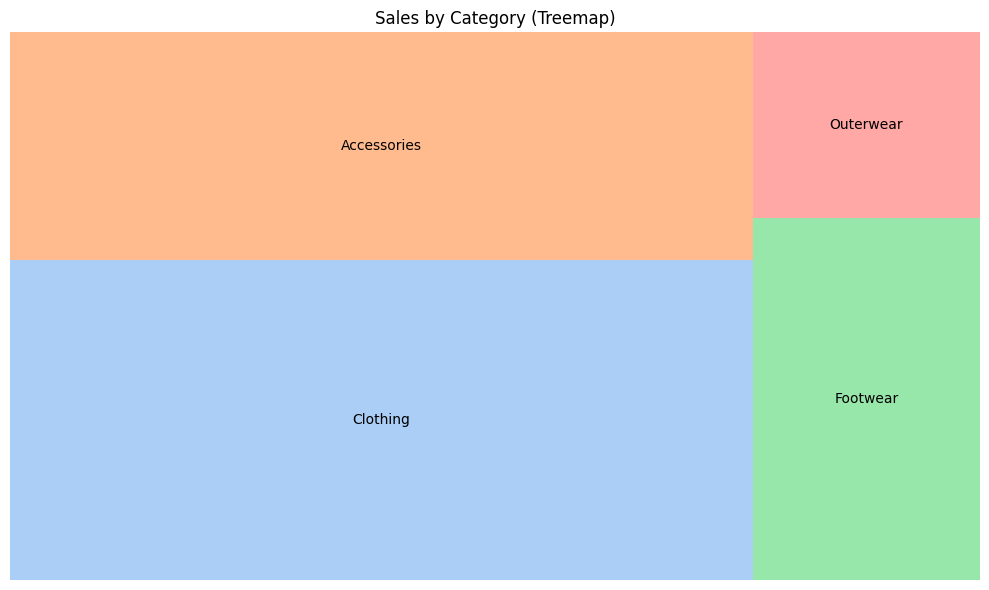

In [ ]:

import squarify
import seaborn as sns

plt.figure(figsize=(10, 6))
squarify.plot(sizes=category_sales.values, label=category_sales.index, color=sns.color_palette("pastel"), alpha=0.9)
plt.title('Sales by Category (Treemap)')
plt.axis('off')
plt.tight_layout()
plt.show()


# **Note:**
- the treemap shows the categories most purchased  by the the top customers in the datset
- Clothing is the most important category as a purchase .
- Accessories are the second most purchased by the customers .

**5-Customer Purchase Frequency by Subscription Status**

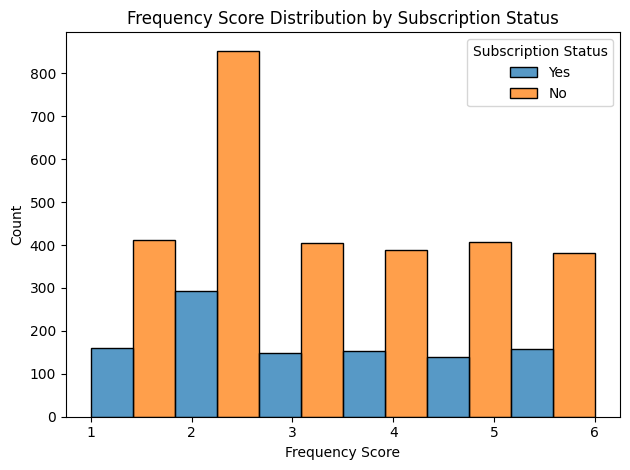

In [ ]:
sns.histplot(data=data, x='Frequency Score', hue='Subscription Status', multiple='dodge', bins=6)
plt.title('Frequency Score Distribution by Subscription Status')
plt.tight_layout()
plt.show()




# **Note:**
- The histogram  shows the distribution of frequency score ( weekly, annulay , every 3 months .....) by supscrption status.
- we want to see how frequent the subscribed customers purchase.
- through the histogram , we can notice theat even the frequent purchasers are not subsribed .
- we can say that the subsribed status not dependent to the frequency of purchasers .


**6-Customer Purchase Amounts by Discount Status**

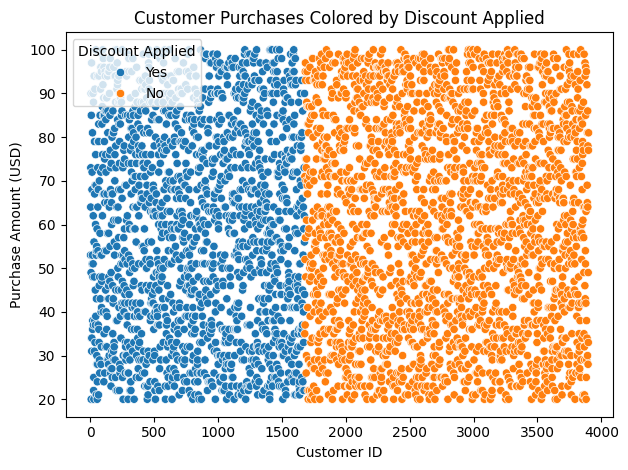

In [ ]:

sns.scatterplot(x='Customer ID', y='Purchase Amount (USD)', hue='Discount Applied', data=data)
plt.title('Customer Purchases Colored by Discount Applied')
plt.tight_layout()
plt.show()




# **Note:**
- The dot plot show the customer purchase by discount applied.
- Most of the purchases done , they didn't use discount.


**7-Distribution of Payment Methods Used by Customers**

In [ ]:
payment_counts = data['Payment Method'].value_counts()
payment_counts


,count
Payment Method,
PayPal,677
Credit Card,671
Cash,670
Debit Card,636
Venmo,634
Bank Transfer,612


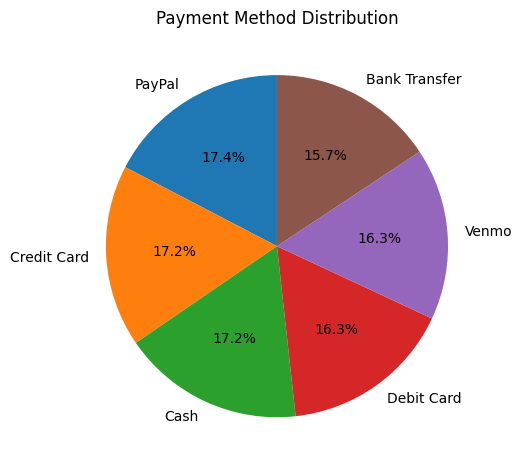

In [ ]:

payment_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


# **Note:**
- Most customers they pay using Paypal (17.4%)
- The second most payment methods use by customers is by credit card and cash (17.2%)


In [ ]:
color_sales = data.groupby('Color')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10)
print(color_sales)


Color
Green     11104
Teal      10459
Yellow    10308
Olive     10292
Cyan      10274
Violet    10245
Gray       9936
Silver     9832
Black      9753
Maroon     9405
Name: Purchase Amount (USD), dtype: int64


**8-Total Spending by Age Group**

In [ ]:
#wich age spend the most
bins = [0, 18, 25, 35, 50, 70, 100]
labels = ['<18', '18-25', '26-35', '36-50', '51-70', '70+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

age_group_spending = data.groupby('Age Group')['Purchase Amount (USD)'].sum()
age_group_spending


<ipython-input-65-d8936d081733>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = data.groupby('Age Group')['Purchase Amount (USD)'].sum()


,Purchase Amount (USD)
Age Group,
<18,4139
18-25,30491
26-35,44342
36-50,65629
51-70,88480
70+,0


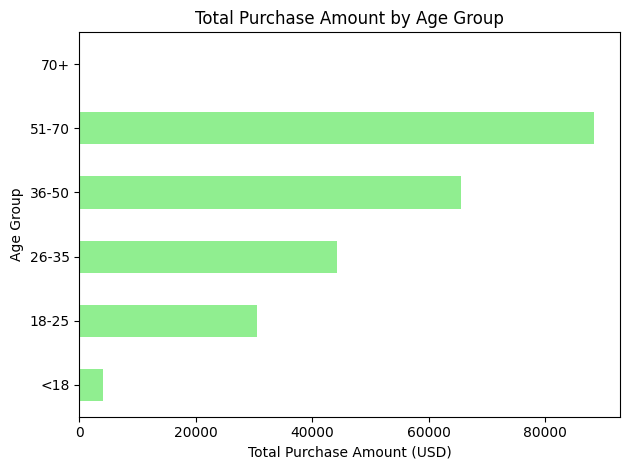

In [ ]:
age_group_spending.plot(kind='barh', color='lightgreen')
plt.title('Total Purchase Amount by Age Group')
plt.xlabel('Total Purchase Amount (USD)')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


- the plot compares the total amount of money spent is (USD dollars) by customers from different age groups .
- from 51-70: this group spent the most nearly 90,000 USD , these are likely loyal or high-income customers with greater purchasing power.
- from 36-50 : the second spenders a strongly active age group in purchasing.
- from 26-35 ; spend less than the two older groups but still significant.

**9-Total Purchase Amount by Gender**

In [ ]:
#wich gender spend the most
gender_spending = data.groupby('Gender')['Purchase Amount (USD)'].sum()
gender_spending

,Purchase Amount (USD)
Gender,
Female,75191
Male,157890


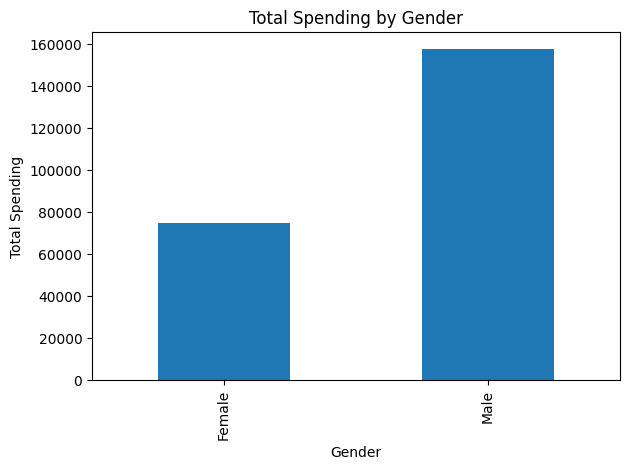

In [ ]:
gender_spending.plot(kind='bar', title='Total Spending by Gender', ylabel='Total Spending', xlabel='Gender')
plt.tight_layout()
plt.show()

# **Note :**
- Males spend significantly more than females overall
- thetotal spending for males is nearly double that of females (just by visully comparing the bar heights)

In [ ]:
#let see the value vounts of purchase made by male and female
gender_counts = data['Gender'].value_counts()
gender_counts

,count
Gender,
Male,2652
Female,1248


**10-Top Revenue-Generating Regions**

In [ ]:
#let us check the different locations we have :
locations = data['Location'].unique()
locations

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [ ]:
region_revenue = data.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10)
region_revenue

,Purchase Amount (USD)
Location,
Montana,5784
Illinois,5617
California,5605
Idaho,5587
Nevada,5514
Alabama,5261
New York,5257
North Dakota,5220
West Virginia,5174


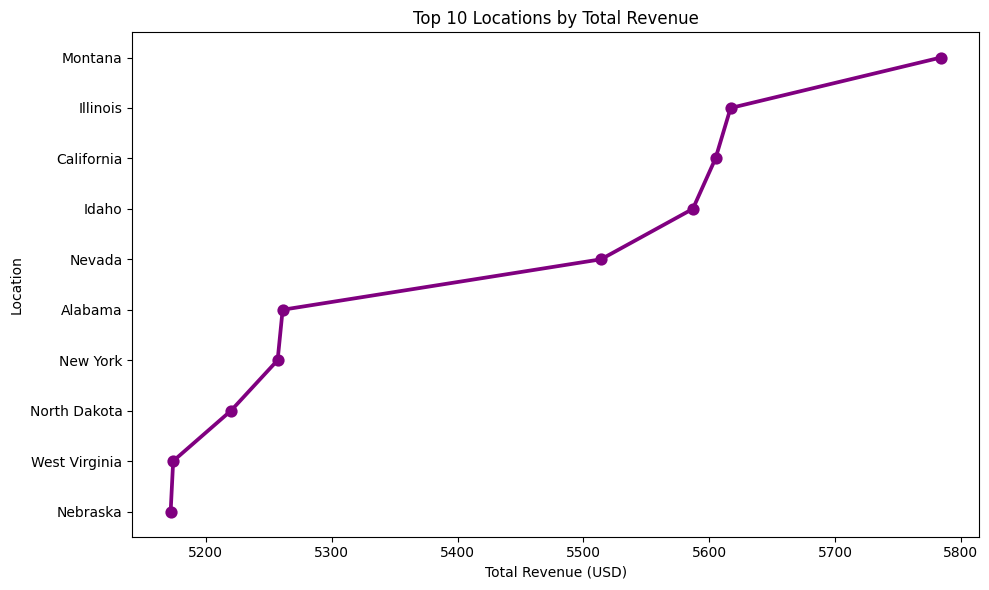

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.pointplot(x=region_revenue.values, y=region_revenue.index, color='purple')
plt.title('Top 10 Locations by Total Revenue')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Location')
plt.tight_layout()
plt.show()



#**Note**:
- **Nebraska** generates the **lowest total revenue** ( a bit under 5200 USD dollars).
- **Montana** Generates the highest Total revenue , nearly 5800 Dollars.
- States likes **West Virginia** , **North Dakota** , and **New York** are in lower range , while **Idaho** , **California** and **lllinois** are in the higher range .



In [ ]:
#lets se how many categories we have in the dataset
categories = data['Category'].unique()
categories

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

**11-Category Distribution - Total Revenue by Product Category**

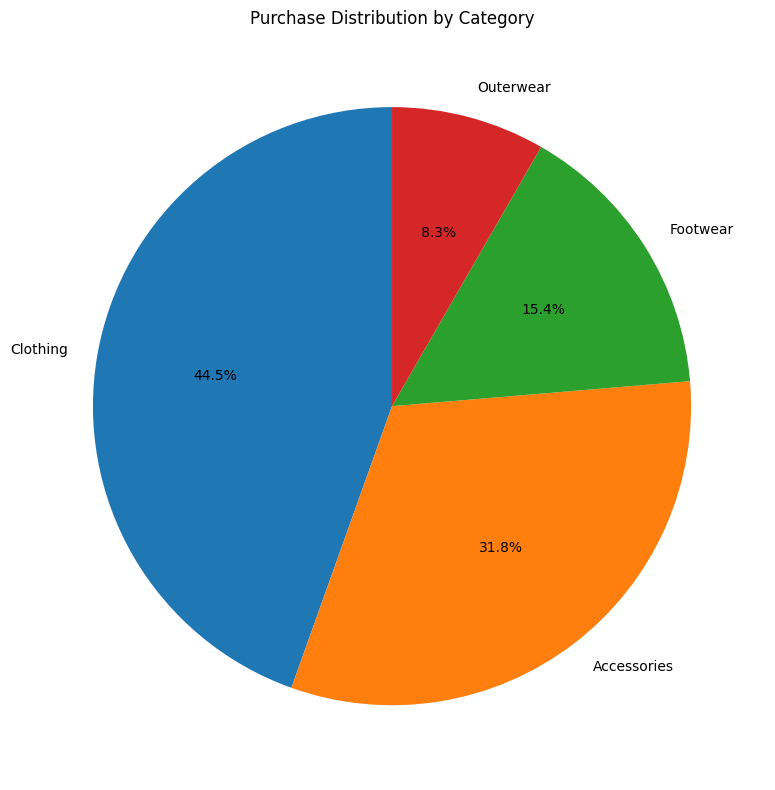

In [ ]:

category_counts = data['Category'].value_counts()

# Pie chart
category_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Purchase Distribution by Category')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()


Note:
- Clothing is the most purchase category (44.5%)
- the second most purchased category are Accessories (31.8%)

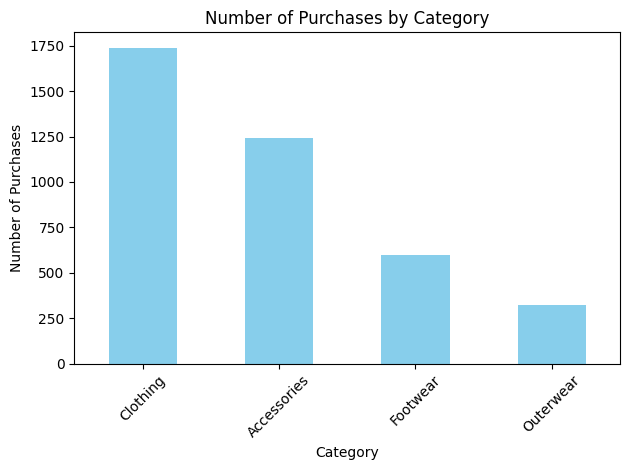

In [ ]:
category_counts.plot(kind='bar', color='skyblue', title='Number of Purchases by Category')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


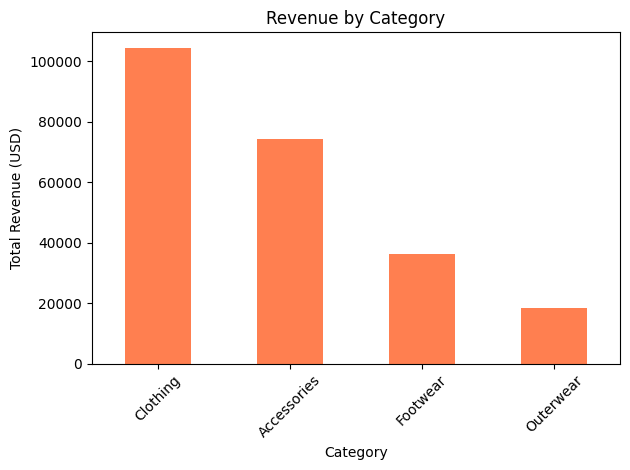

In [ ]:
category_revenue = data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

category_revenue.plot(kind='bar', color='coral', title='Revenue by Category')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Note:**
- the clothing  category is the most profitable one(12000 USD dollard ) , followed by accesoories ( 75 000 USD dollars)


**12-Seasonal Trends in Product Category Purchases**

In [ ]:
season_category_counts = data.groupby(['Season', 'Category']).size().reset_index(name='Count')
season_category_counts.head()


,Season,Category,Count
0,Fall,Accessories,324
1,Fall,Clothing,427
2,Fall,Footwear,136
3,Fall,Outerwear,88
4,Spring,Accessories,301


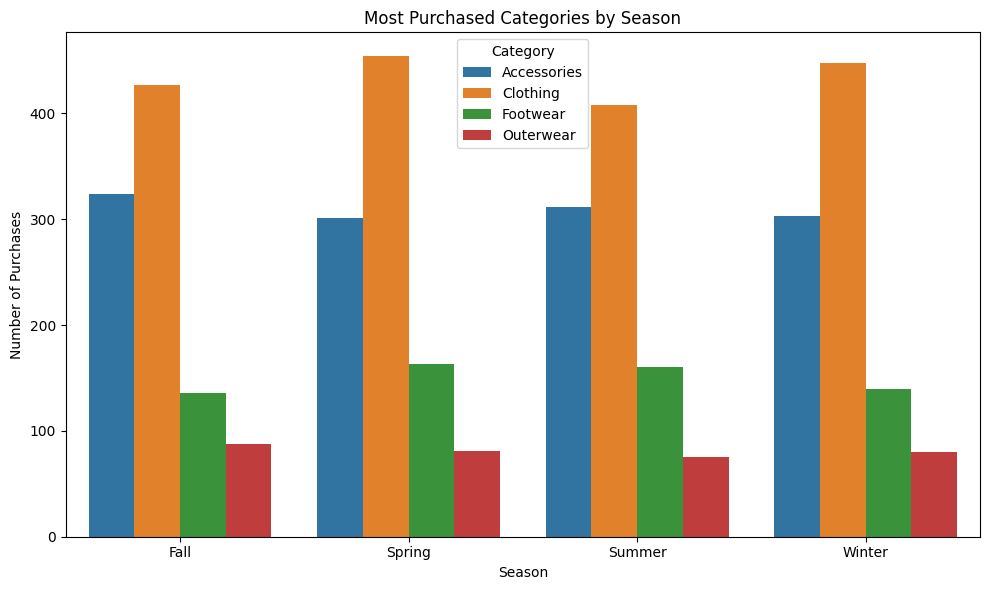

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=season_category_counts, x='Season', y='Count', hue='Category')
plt.title('Most Purchased Categories by Season')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()


# **Note:**
- clothing is the top-selling category year round .
- Acessories perform well in all seasons , especially in Fall and summer
- Footware has seasonal peaks , likely due to the summer sandals or spring shoes
-Outerwear deamd rises in Fall and winter .

**13-Customer Preferences for Shipping Methods**

In [ ]:
#let us see the shippin type that we have in the datset :
shipping_types = data['Shipping Type'].unique()
shipping_types

array(['Express', 'Free Shipping', 'Next Day Air', 'Standard',
       '2-Day Shipping', 'Store Pickup'], dtype=object)

In [ ]:
# Get top 10 customer IDs
top_customer_ids = top_customers.index.tolist()

# Filter original dataset
top_customer_data = data[data['Customer ID'].isin(top_customer_ids)]

# Group by Customer ID and Shipping Type
shipping_by_top = top_customer_data.groupby(['Customer ID', 'Shipping Type']).size().reset_index(name='Count')
print(shipping_by_top)


   Customer ID  Shipping Type  Count
0            4   Next Day Air      1
1          769        Express      1
2          993        Express      1
3         1069       Standard      1
4         1512        Express      1
5         1848  Free Shipping      1
6         1889  Free Shipping      1
7         2289   Next Day Air      1
8         2446   Store Pickup      1
9         3582   Next Day Air      1


In [ ]:

#let see the most shippint type used
shipping_counts = data['Shipping Type'].value_counts()
shipping_counts


,count
Shipping Type,
Free Shipping,675
Standard,654
Store Pickup,650
Next Day Air,648
Express,646
2-Day Shipping,627


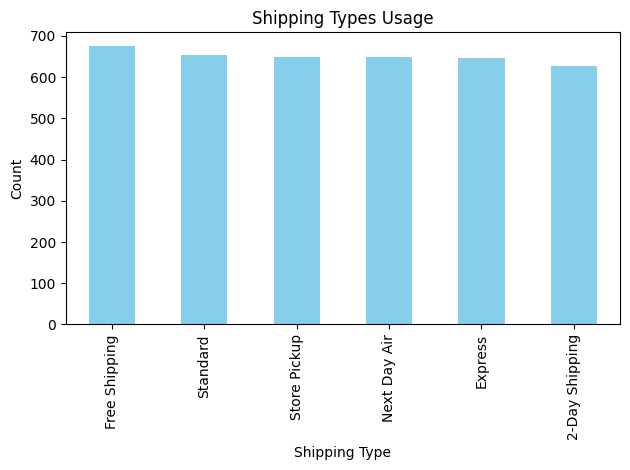

In [ ]:
shipping_counts.plot(kind='bar', color='skyblue')
plt.title('Shipping Types Usage')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()





# **Note:**
- Customers love Free shipping , it is a strong motivator
- other shipping types are evenly used , which suggests customers are choosing based on convenience or urgency
- Store Pickup being as popular as shipping option shows that some users in store collection possibly to save time or shipping costs.


**14-Promo Code Usage by Gender and Age Group**

In [ ]:
#let us see how many people they have use discout code
discount_counts = data['Discount Applied'].value_counts()
discount_counts

,count
Discount Applied,
No,2223
Yes,1677


In [ ]:
#let us see wich gender and age they have use to discount code
gender_discount = data.groupby('Gender')['Discount Applied'].value_counts()
gender_discount



Gender  Discount Applied
Female  No                  1248
Male    Yes                 1677
        No                   975
Name: count, dtype: int64

<ipython-input-85-350907835a9f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_usage = used_discounts.groupby(['Gender', 'Age Group']).size().reset_index(name='Count')


  Gender Age Group  Count
0   Male       <18     29
1   Male     18-25    218
2   Male     26-35    323
3   Male     36-50    464
4   Male     51-70    643
5   Male       70+      0


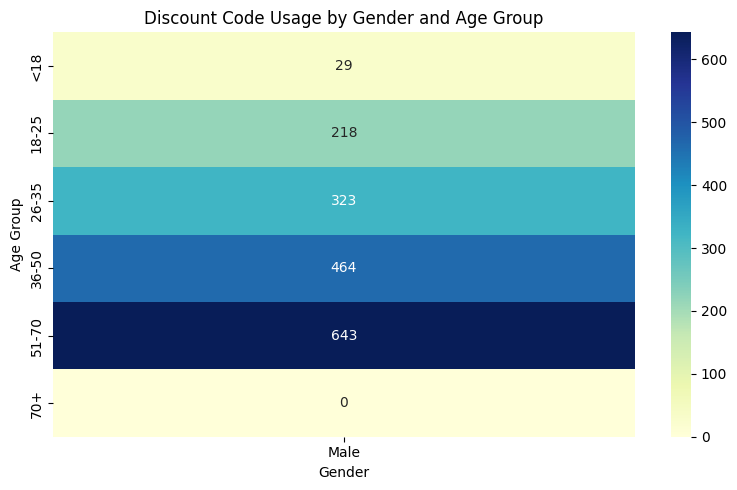

In [ ]:

# Filter only rows where a promo code was used
used_discounts = data[data['Promo Code Used'] == 'Yes']

discount_usage = used_discounts.groupby(['Gender', 'Age Group']).size().reset_index(name='Count')
print(discount_usage)

# Pivot table for heatmap
heatmap_data = discount_usage.pivot(index='Age Group', columns='Gender', values='Count')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Discount Code Usage by Gender and Age Group')
plt.ylabel('Age Group')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()


# **Note:**
- Discount code usage increases with age up to the 51-70 age group .
- Peak usage is by males aged 51-70
- No usage by males aged +70
- Very low usage is those under 18


**15-Top-Rated Product Categories by Average Review Score**

In [ ]:
product_reviews = data.groupby(['Category', 'Item Purchased'])['Review Rating'].mean().reset_index()
top_rated_by_category = product_reviews.sort_values(['Category', 'Review Rating'], ascending=[True, False]).drop_duplicates('Category')
print(top_rated_by_category)


       Category Item Purchased  Review Rating
2   Accessories         Gloves       3.864286
18     Clothing        T-shirt       3.782993
20     Footwear        Sandals       3.841250
24    Outerwear         Jacket       3.763190


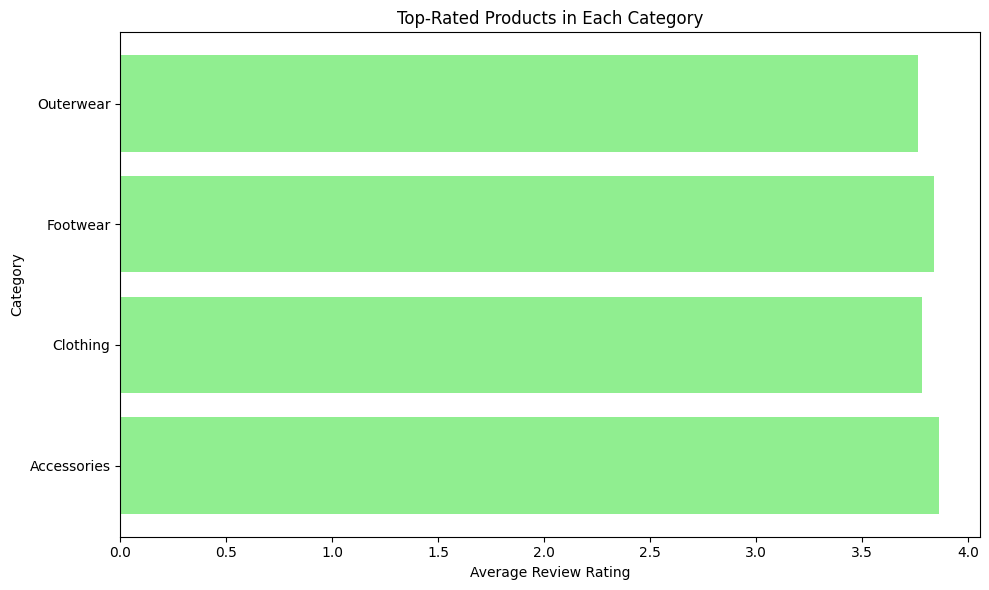

In [ ]:


plt.figure(figsize=(10, 6))
plt.barh(top_rated_by_category['Category'], top_rated_by_category['Review Rating'], color='lightgreen')
plt.title('Top-Rated Products in Each Category')
plt.xlabel('Average Review Rating')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


# **Note:**
- Footware and Accessories have the highest average rating (close to 4 )
- In general all Categoreis are well rated by customers , meaning userd are generally satisfied across the board.

**16-Product Popularity vs. Customer Satisfaction by Category**

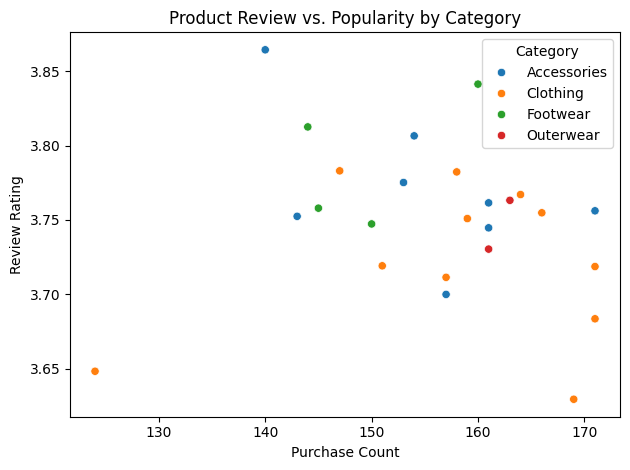

In [ ]:

product_stats = data.groupby(['Category', 'Item Purchased']).agg({
    'Review Rating': 'mean',
    'Item Purchased': 'count'
}).rename(columns={'Item Purchased': 'Purchase Count'}).reset_index()

sns.scatterplot(data=product_stats, x='Purchase Count', y='Review Rating', hue='Category')
plt.title('Product Review vs. Popularity by Category')
plt.tight_layout()
plt.show()


# **6-Correlation**

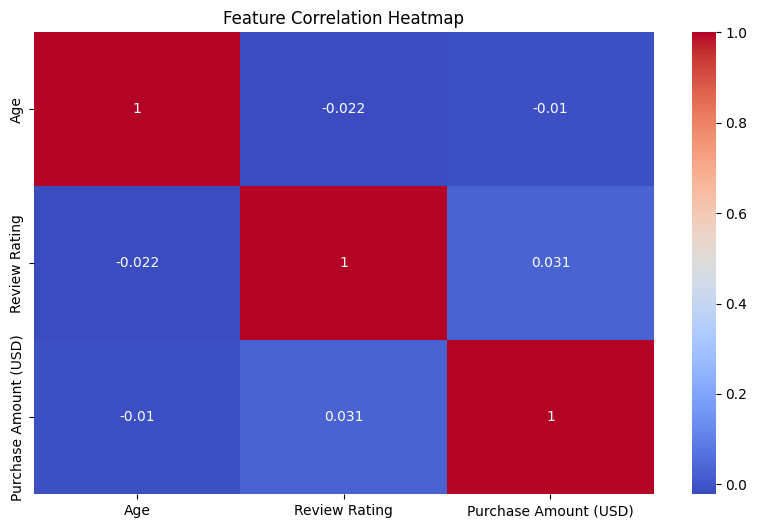

In [ ]:
numeric_data = data[['Age', 'Review Rating', 'Purchase Amount (USD)']]

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# **Note**:
- The hetamap correlation studies the relationship between numerical features
- It shows how Strongly different features are related to each other
- All correlation between different features are very close to zero , menaing that there is no meaningful reletionship  between age , review rating and purchase amount
- As customoers's age increases , their review rating or purchase amount doesn't significantly change .

In [ ]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Frequency Score,prev_scaled,freq_scaled,amount_scaled,Customer Value Score,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,14,Venmo,Fortnightly,4,0.265306,0.6,0.4125,0.425935,51-70
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,2,Cash,Fortnightly,4,0.020408,0.6,0.5500,0.390136,18-25
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,23,Credit Card,Weekly,6,0.448980,1.0,0.6625,0.703827,36-50
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,49,PayPal,Weekly,6,0.979592,1.0,0.8750,0.951531,18-25
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,31,PayPal,Annually,1,0.612245,0.0,0.3625,0.324915,36-50


- In this analysis, we explored **customer behavior**, **product performance**, and **sales patterns** to help the company make smarter, more profitable decisions.

- Here’s what we found:

  - Top customers bring a lot of value. They buy more often and spend more. We should reward them with loyalty programs or special offers to keep them coming back.

  - Some age groups and genders spend more than others. Knowing this helps us create targeted marketing campaigns that speak directly to our best customer segments.

  - Certain product categories make the most money, and some get the best reviews. These are the products we should promote more, keep in stock, and maybe even bundle with slower-moving items.

  - Seasonal trends matter — different categories perform better in different seasons. We should prepare our stock and promotions based on these patterns to increase sales at the right time.

  - Discount codes are used more by specific age and gender groups. Instead of offering discounts to everyone, we can focus them where they’ll have the biggest impact.

  - Shipping and payment preferences tell us how customers like to shop. Making sure these options are easy and available will improve the overall customer experience.

  - Some products are popular but get low ratings — this is a red flag. We should investigate and improve quality where needed. At the same time, we found highly rated products that are not popular — those are hidden gems we can promote more.

- By understanding what our customers buy, when they buy, and how they feel about their purchases, we can make better decisions that lead to higher profits, happier customers, and smarter marketing.

# **Machine Learning Models:**



# **1-Customer Segmentation:**

- This model helps us group customers based on how they shop — like how much they spend, how often they buy, and whether they use discounts.

**Why it’s useful for the business:**

  - We can find out who our best customers are.

  - We can send the right offers to the right groups.

  - It helps with smarter marketing and keeps customers happy.

  
- We used an **unsupervised machine learning algorithm** called **K-Means** Clustering to group customers based on their shopping behavior.
This algorithm doesn’t need labeled data — it **finds patterns** on its own and creates groups like **loyal customers**, **discount users**, or **occasional buyers**.




In [ ]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Frequency Score',
       'prev_scaled', 'freq_scaled', 'amount_scaled', 'Customer Value Score',
       'Age Group'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler=StandardScaler()

# **Note:**
- I am grouping customer into clusters based on:
   - Previous Purchase
   - Review Rating
   - Purchase Amount (USD)
   - Customer Value Score

In [ ]:
features = data[['Previous Purchases', 'Review Rating',
                 'Purchase Amount (USD)', 'Customer Value Score']]


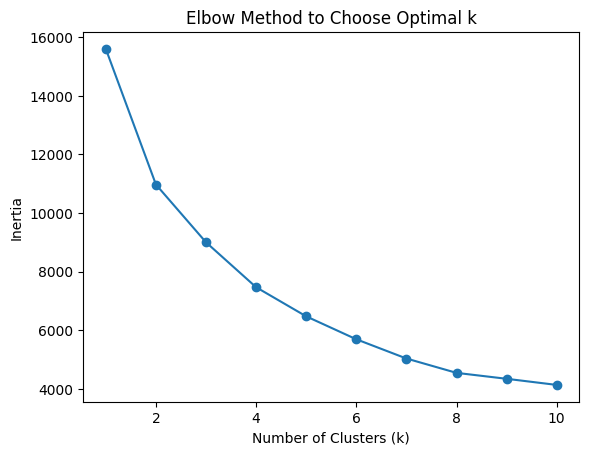

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Choose Optimal k')
plt.show()


# **Note:**
- Based on Plot , the elbow point ,wehre the inertia stops decreasing sharply and starts to level off .
- The elbow is clearly around k=3
- K=3 is the optiman number of clusters

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)


         Previous Purchases  Review Rating  Purchase Amount (USD)  \
Cluster                                                             
0                 32.190547       3.800443              81.802068   
1                 11.286391       3.768450              54.275559   
2                 36.122544       3.660430              39.434986   

         Customer Value Score  
Cluster                        
0                    0.650979  
1                    0.334749  
2                    0.468209  


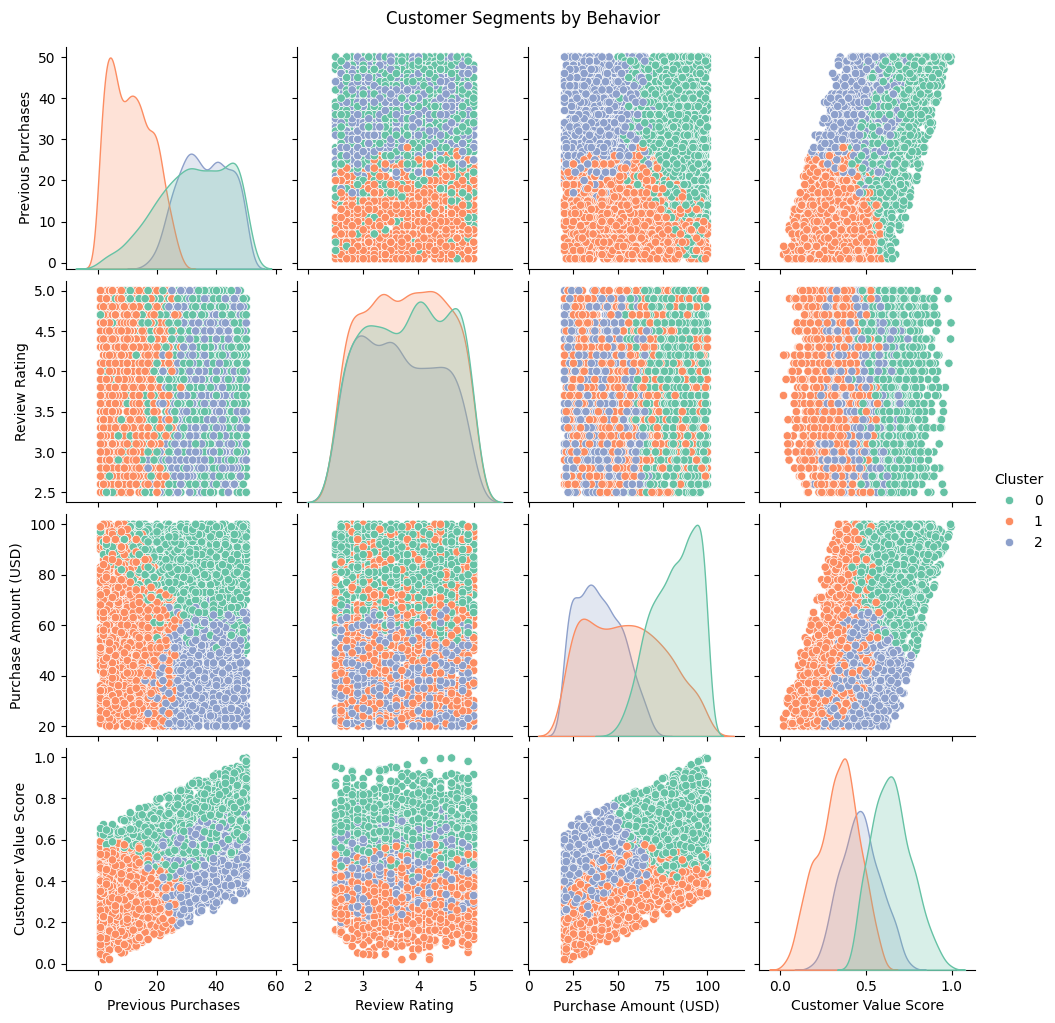

In [ ]:

print(data.groupby('Cluster')[['Previous Purchases', 'Review Rating',
                               'Purchase Amount (USD)', 'Customer Value Score']].mean())

# Visualize with pairplot
sns.pairplot(data[['Previous Purchases', 'Review Rating','Purchase Amount (USD)', 'Customer Value Score', 'Cluster']],
             hue='Cluster', palette='Set2')
plt.suptitle('Customer Segments by Behavior', y=1.02)
plt.show()


# **Note**
- **Cluster 0**: these are the **best customers** , they buy frequently (previous Purchase=32.2), the spend the most (Purchase amount=81.8 USD), and leave good reviews (3.80)

- **Cluster 1**: thse are **average customers** ,with moderate purchases ,decent spend  (54.3 USD), and decent reviews (3.77)

- **Cluster 2:** these **customers purchase often but spend less** (39.4 USD), and give lower reviews(3.66 )

In [ ]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Previous Purchases,Payment Method,Frequency of Purchases,Frequency Score,prev_scaled,freq_scaled,amount_scaled,Customer Value Score,Age Group,Cluster
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,14,Venmo,Fortnightly,4,0.265306,0.6,0.4125,0.425935,51-70,2
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,2,Cash,Fortnightly,4,0.020408,0.6,0.5500,0.390136,18-25,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,23,Credit Card,Weekly,6,0.448980,1.0,0.6625,0.703827,36-50,2
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,49,PayPal,Weekly,6,0.979592,1.0,0.8750,0.951531,18-25,0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,31,PayPal,Annually,1,0.612245,0.0,0.3625,0.324915,36-50,1


In [ ]:
cluster_labels = {
    0: 'VIP',
    1: 'Average',
    2: 'Low-Value'
}

data['Customer Segment'] = data['Cluster'].map(cluster_labels)


In [ ]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Payment Method,Frequency of Purchases,Frequency Score,prev_scaled,freq_scaled,amount_scaled,Customer Value Score,Age Group,Cluster,Customer Segment
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Venmo,Fortnightly,4,0.265306,0.6,0.4125,0.425935,51-70,1,Average
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Cash,Fortnightly,4,0.020408,0.6,0.5500,0.390136,18-25,1,Average
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Credit Card,Weekly,6,0.448980,1.0,0.6625,0.703827,36-50,0,VIP
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,PayPal,Weekly,6,0.979592,1.0,0.8750,0.951531,18-25,0,VIP
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,PayPal,Annually,1,0.612245,0.0,0.3625,0.324915,36-50,2,Low-Value


In [ ]:
#let us drop the cluster column from the dataset
data.drop('Cluster',axis=1,inplace=True)

In [ ]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Previous Purchases,Payment Method,Frequency of Purchases,Frequency Score,prev_scaled,freq_scaled,amount_scaled,Customer Value Score,Age Group,Customer Segment
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,14,Venmo,Fortnightly,4,0.265306,0.6,0.4125,0.425935,51-70,Average
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,2,Cash,Fortnightly,4,0.020408,0.6,0.5500,0.390136,18-25,Average
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,23,Credit Card,Weekly,6,0.448980,1.0,0.6625,0.703827,36-50,VIP
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,49,PayPal,Weekly,6,0.979592,1.0,0.8750,0.951531,18-25,VIP
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,31,PayPal,Annually,1,0.612245,0.0,0.3625,0.324915,36-50,Low-Value


In [ ]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Frequency Score',
       'prev_scaled', 'freq_scaled', 'amount_scaled', 'Customer Value Score',
       'Age Group', 'Customer Segment'],
      dtype='object')

## **Recommended Actions for Each Customer Segment:**

- **VIP Customers** are our best buyers. We should keep them happy with special offers, early access to products, and loyalty rewards.

- **Average Customers** buy from us sometimes. We can encourage them to shop more by offering discounts, product bundles, or points for each purchase.

- **Low-Value Customers** don’t buy much. We can try to bring them back with reminder emails, small discounts, or by asking what they need.

# **2- Product Recommendation System**:
- This model suggests products to customers based on what they’ve bought before, or what other similar customers have purchased.

- It compares customer behavior and finds what products they might like — kind of like how Netflix recommends shows. We used techniques like collaborative filtering and content-based filtering.

**Why it’s useful for the business**:

  - Helps customers find what they need more easily.

  - Increases sales by recommending the right products.

  - Makes the shopping experience more personal and enjoyable.